# Att presentera data på en karta

I denna övning ska vi lära oss presentera nationsspecifika data på världskartan, och som datagrund använder vi information om nationernas koldioxidutsläpp från [Worldbank](https://databank.worldbank.org/home). Datan kan presenteras på många olika sätt. Ett sätt är att hålla alla värden i en tabell. Ur tabellen kan man då förstås söka upp utsläppsvärden från valfritt land, men för att riktigt få en helhetsbild av situationen vore det smart att presentera datan grafiskt på en världskarta.

Vi ska rita en världskarta och färga de länder mörkare, där utsläppen är större.

## Söka och hämta data

Vi börjar med att söka de data vi behöver. I denna övning använder vi en datafil som redan finns sparad med namnet 'CO2-emissions-per-capita-2014.csv' i mappen 'data'. Informationen om koldioxidutsläppen kommer från adressen [https://databank.worldbank.org/source/world-development-indicators#](https://databank.worldbank.org/source/world-development-indicators#).

För att få in informationen på världskartan behöver vi nationsgränserna i vektorform, i en .shp-fil. som tur är finns denna information redan i funktionspaketet [GeoPandas](https://geopandas.org/). Om man vill kan man också ladda ned gränserna i hög kvalitet från [https://www.naturalearthdata.com/downloads/](https://www.naturalearthdata.com/downloads/). På webben kan vi också hitta andra .shp-filer med t.ex. finlands kommungränser.

För att läsa och tolka data använder vi vanligen funktionspaketet [Pandas](https://pandas.pydata.org/). Nu behöver vi också GeoPandas för att få in geografisk information. [Matplotlib](https://matplotlib.org/) behövs för att skapa diagram. Vi börjar med att läsa in funktionspaketen. 

In [1]:
import pandas as pd             # Med pandas-paketet kan vi läsa och hantera data.
import geopandas as gpd         # geopandas är som pandas, men innehåller också geometriska data.
import matplotlib.pyplot as plt # matplotlib hjälper oss visualisera data.

#### Instruktioner för installation (gäller ej online)

Geopandas innehåller geometriska data som behövs för att rita kartdiagram. Modulen geopandas finns inte automatiskt i anaconda-paketet, och om du gör denna övning lokalt på din dator behöver du installera den. Detta gör du genom att öppna kommandotolken *anaconda prompt*, skriva ``conda install geopandas``, och trycka Enter. Anaconda meddelar vilka paket som bör installeras och uppdateras, och frågar ``proceed [y/n]?``. Skriv ``y`` och tryck Enter. Nu finns geopandas på din dator, och kan importeras med hjälp av cellen ovan.

Andra problem som kan uppstå:
- Anaconda lyckas inte installera geopandas? Detta löses genom att uppdatera anaconda. Skriv ``conda update --all`` i anaconda prompt.
- Senare kodceller i detta dokument kan avge felmeddelanden för att geopandas behöver andra paket för att fungera. Dessa kan installeras på samma sett med kommandon ``conda install descartes`` och ``conda install mapclassify``. Bägge installationerna ska bekräftas med ``y`` när Anaconda frågar ``proceed [y/n]?``.



Vi läser in datan och ser vad den innehåller.

In [2]:
# Vi läser in nationsgränserna och sparar dem med variabelnamnet world.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Vi skriver ut de första raderna 
print(world.head())

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


Vi kan se att tabellen har flera kolumner, varav de viktigaste här är "name", som anger nationens namn, och "geometry", som anger information om gränserna.

Vi kan, med hjälp av geopandas, rita ut datan med plot-kommandot.

<AxesSubplot:>

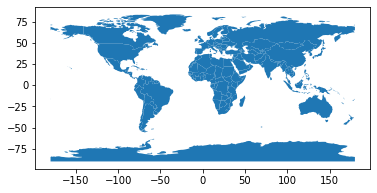

In [3]:
world.plot()

Resultatet är alldeles tydligt en världskarta. Nu behöver vi också färga länderna enligt deras koldioxidutsläpp.

Vi läser in utsläppsdatan och ser vad den innehåller.

In [7]:
# Vi läser in CO2-utsläppsdatan och sparar den som CO2_2014.

CO2_2014 = pd.read_csv('../data/CO2-emissions-per-capita-2014.csv')

# Vi skriver ut de första raderna av datan
print(CO2_2014.head())

     Country Name Country Code                             Series Name  \
0     Afghanistan          AFG  CO2 emissions (metric tons per capita)   
1         Albania          ALB  CO2 emissions (metric tons per capita)   
2         Algeria          DZA  CO2 emissions (metric tons per capita)   
3  American Samoa          ASM  CO2 emissions (metric tons per capita)   
4         Andorra          AND  CO2 emissions (metric tons per capita)   

      Series Code      2014 [YR2014]  
0  EN.ATM.CO2E.PC  0.253727945460333  
1  EN.ATM.CO2E.PC   1.90006971019389  
2  EN.ATM.CO2E.PC   3.73580277736793  
3  EN.ATM.CO2E.PC                 ..  
4  EN.ATM.CO2E.PC   5.83290621488897  


Vi märker att koldioxidutsläppens data finns i kolumnen "2014 [YR2014]", i enheten *ton per person (per år)*. Vi ser också att kolumnen med ländernas namn eller landskod har olika namn i de båda tabellerna. Detta måste beaktas när tabellerna ska kombineras. När vi vill rita in nationsspecifika data på kartan behöver vi förena tabellerna så att landets geometriska information finns på samma rad som utsläppsdatan. Detta kan göas med merge-funktionen.

In [9]:
import numpy as np

# Tabellen saknar värden för vissa länder. Dessa är märkta med "..", och vi behöver ta bort dem ur tabellen.
# Vi ser sedan till att utsläppen är angivna som siffror (float), och inte som text (string).


CO2_2014 = CO2_2014[CO2_2014["2014 [YR2014]"]!='..'] # != betyder "ej lika med". Vi väljer ut de rader som inte inehåller ".."
CO2_2014['2014 [YR2014]'] = CO2_2014['2014 [YR2014]'].astype('float64')


# Vi kombinerar 'world'-datan och 'CO2_2014'-datan med name/Country name-kolumnerna som referens.
data = world.merge(CO2_2014, left_on='name', right_on='Country Name')

## Visualisera data

Nu när vi har förenat tabellerna, kan vi använda dem för att rita ett diagram med plot-funktionen. Som parametrar i plot-funktionen använder vi kolumnen med kvantiteten (koldioxidutsläpp) som avgör hur vi färglägger länderna, bildstorlek och färgskala ('Greens').

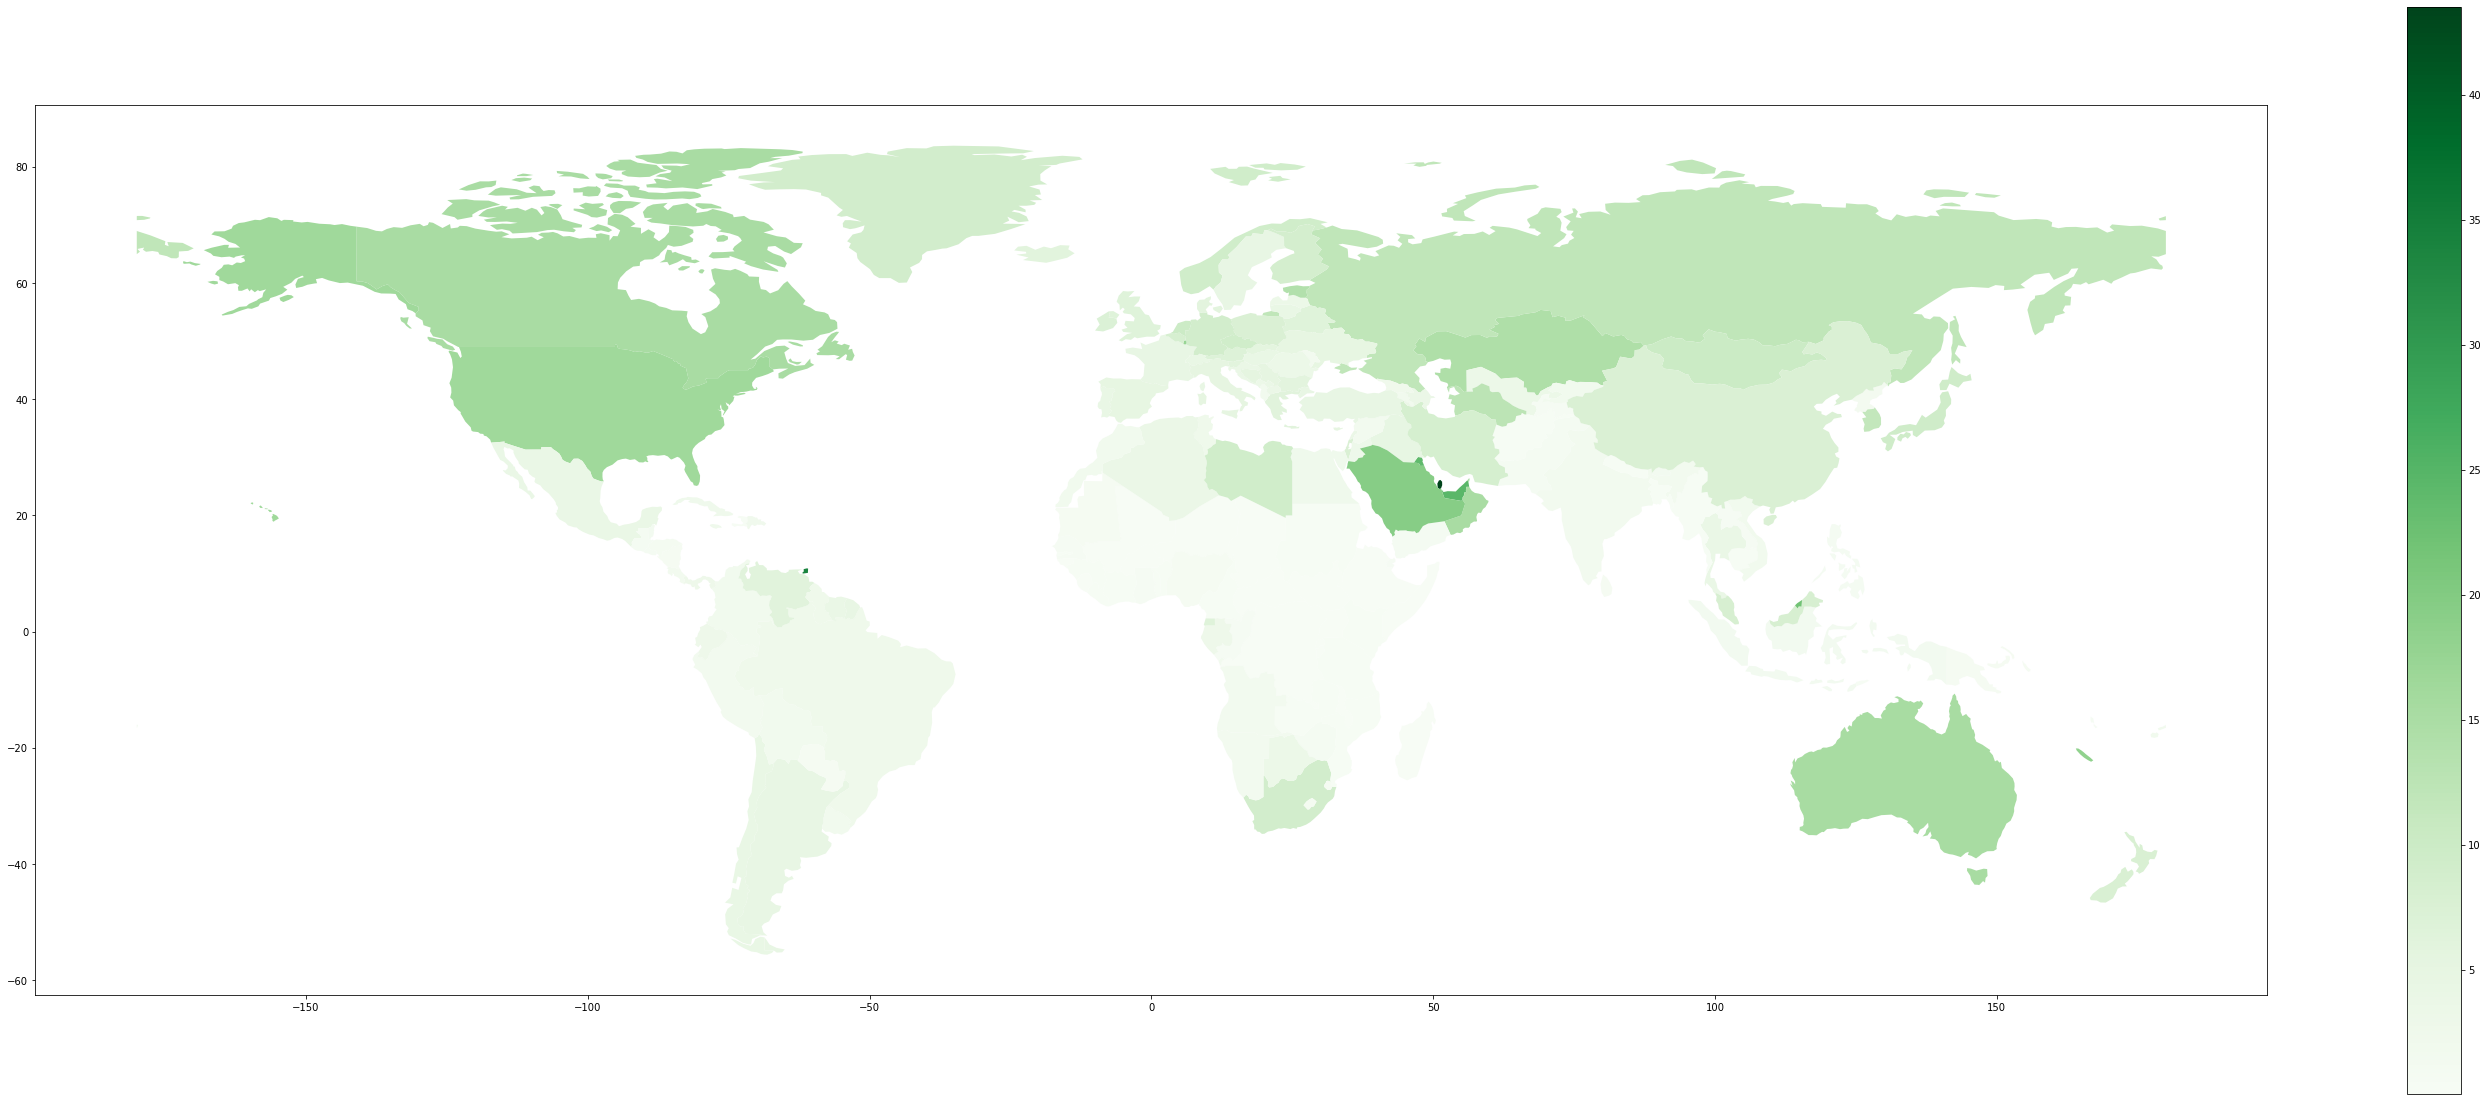

In [14]:
data.plot(column='2014 [YR2014]', figsize=(50,20), cmap='Greens', legend=True, k=6) # 6 olika nyanser
plt.show()

Kartan visar oss en jämförelse mellan olika länders utsläpp, men indelningen är inte så tydlig. Detta beror på att klasserna automatiskt delas in så att varje klass är lika stor inom undersökningsintervallet 0,04-43,52 ton/capita. Fördelningen av länder mellan klasserna är inte alls jämn. Vi kan istället dela in länderna i lika stora grupper, så kallade *kvantiler*, så att vi till exempel har en sjättedel av länderna i varje klass. Vi lägger också till ett kommando som markerar de övriga länderna med grå streck, så att vi ser var informationen saknas också.

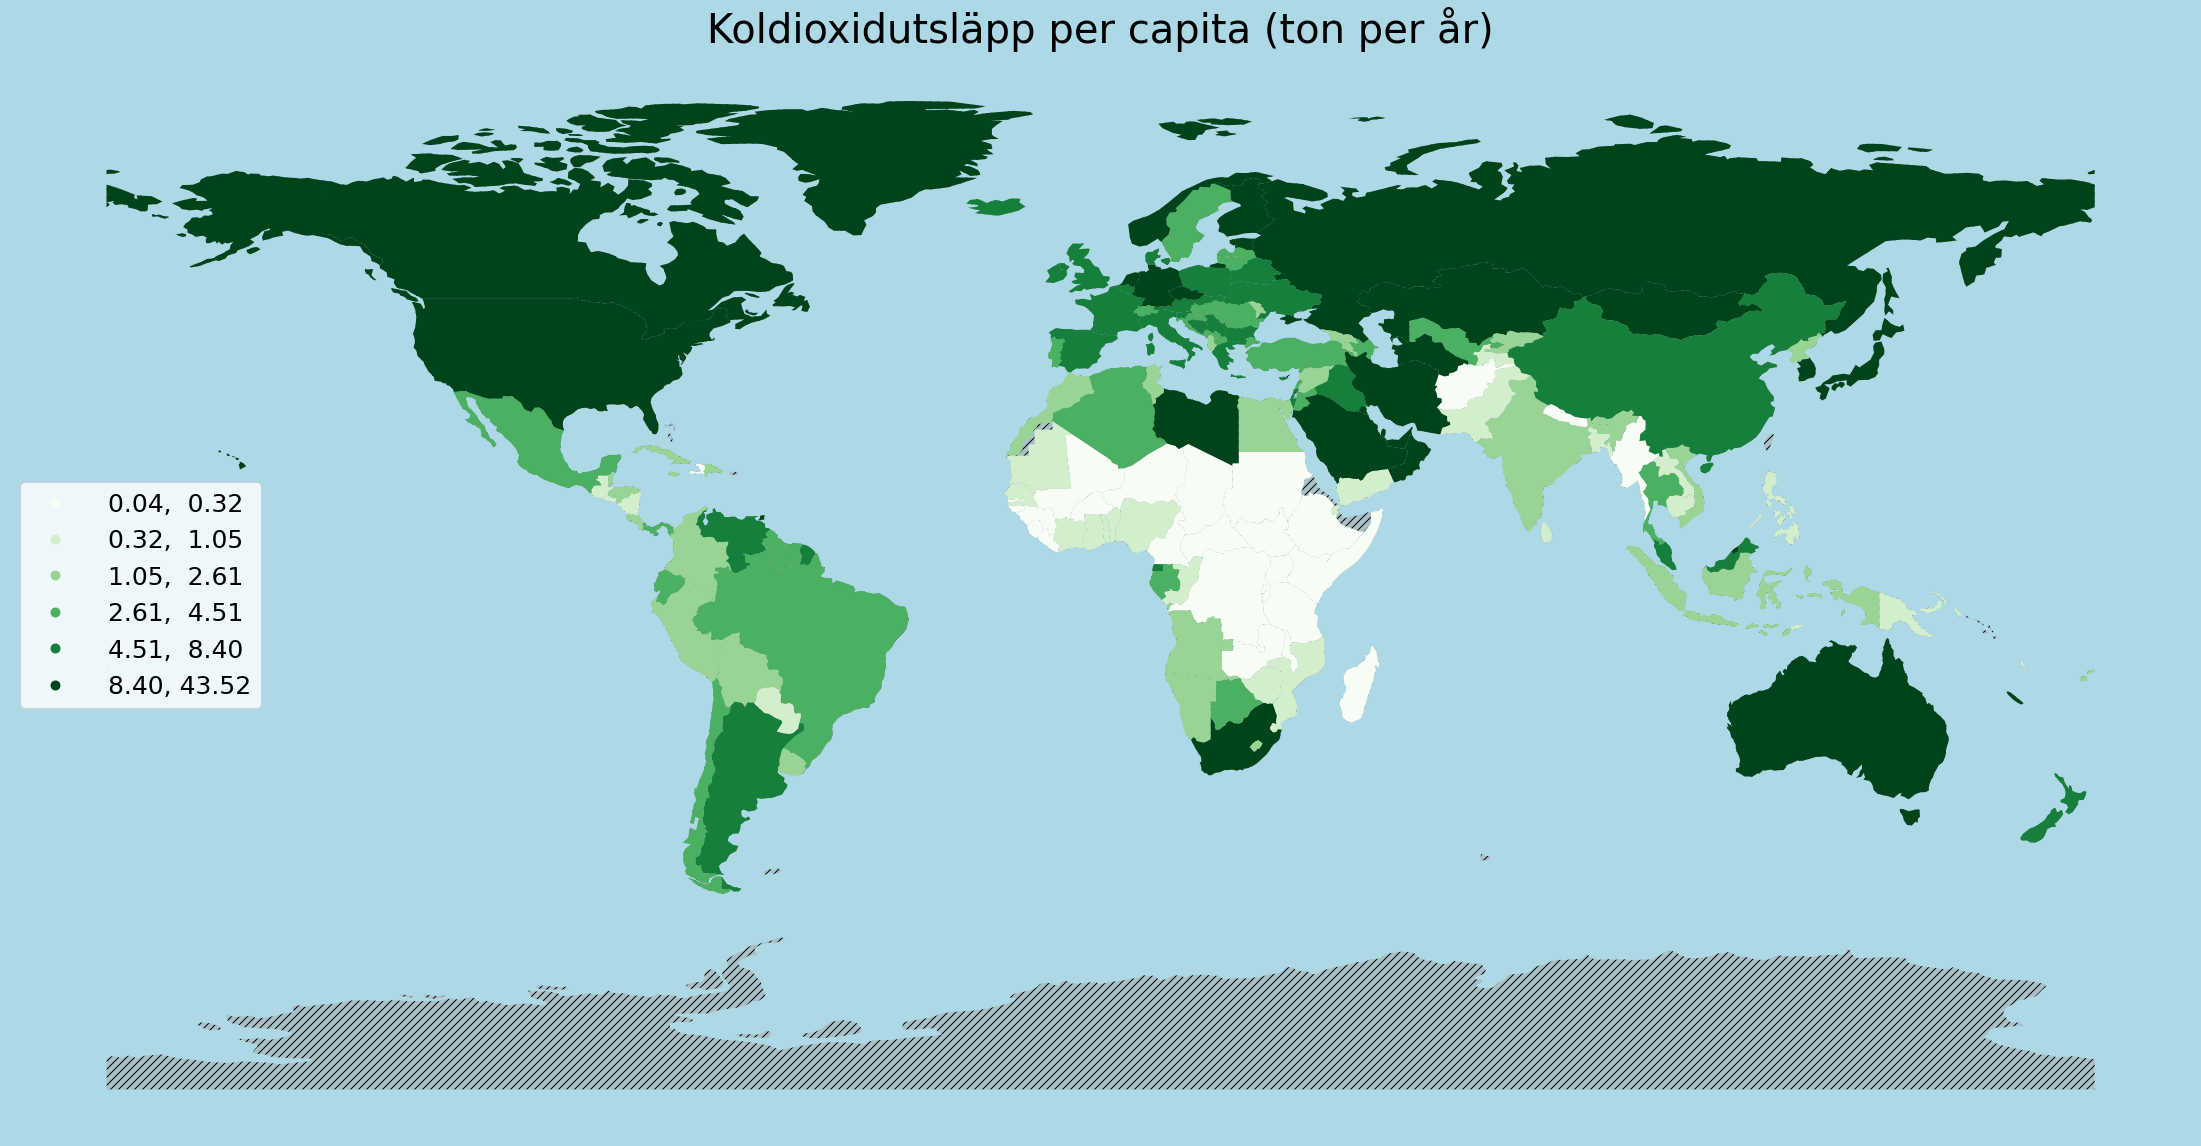

In [13]:
# Vi väljer bildstorlek och bakgrundsfärg: ljusblå
fig, ax = plt.subplots(1, figsize=(50,20), facecolor='lightblue')

# Vi ritar in alla länder och streckar dem.
# De som saknar information kommer att förbli gråstreckade efter att vi har fyllt i resten.
world.plot(ax=ax, color='darkgrey', alpha=0.5, hatch= "///")

# Vi ritar kartdiagrammet på kartan.
data.plot(
    column='2014 [YR2014]', # Vi väljer informationskolumn (koldioxidutsläpp)
    ax=ax,                  # Vi ritar bilden på samma axel som bakgrunden
    cmap='Greens',          # Vi använder toner av grön för färgkartan.
    legend=True,            # Vi lägger till en förklaringsruta
    legend_kwds={           #
        'fontsize': 25,     # Fontstorlek på förklaringen
        'loc':'center left' # Förklaringens placering
    },                      #
    scheme='quantiles',     # Vi delar in länderna i kvantiler
    k=6                     # Vi väljer antalet kvantiler: 6
)

# Vi lägger till en rubrik
plt.title('Koldioxidutsläpp per capita (ton per år)',fontsize = 40)

# Vi tar bort axlarna för att snygga till det
ax.axis('off')

# Och slutligen visar vi bilden.
plt.show()


Nu kan vi lättare urskilja de olika områdena och deras nivåer av koldioxidutsläpp. Du kan också pröva dela in datan i fler eller färre än 6 delar. Hur tycker du att kartan blir tydligast?

Nu är det dags att söka upp någon egen datafil som verkar intressant, och visualisera den på samma sätt. Du kan hitta sådana filer genom att googla, eller från adresserna [https://databank.worldbank.org/](https://databank.worldbank.org/source/world-development-indicators#) och [https://ourworldindata.org/](https://ourworldindata.org/). Dessa hemsidor visar informationen på kartor direkt, men försök skapa dem själv också.